# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

<h3>please run the installation in the cell below</h3>

#Install those libraries as python 13 and up are not available in the terminal

!python -m spacy download en_core_web_sm

## Load Data

In [2]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

## Data Exploration

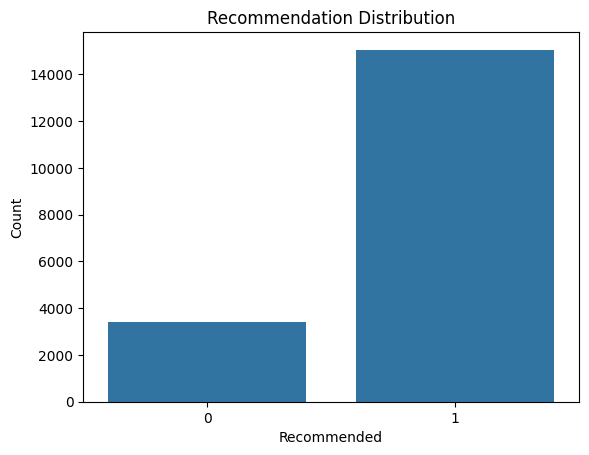

In [5]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Exploring recommendation Distribution 
sns.countplot(data=df, x='Recommended IND')
plt.title('Recommendation Distribution')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

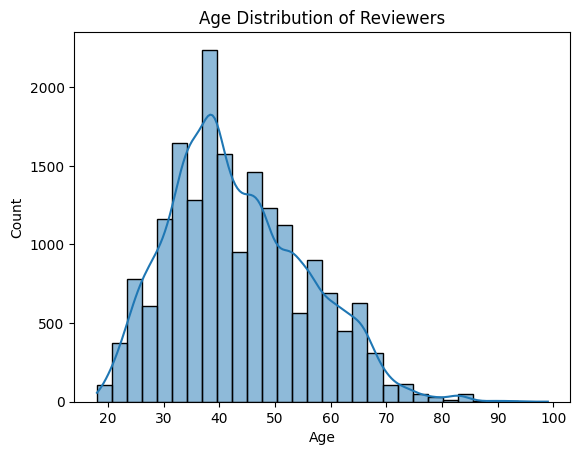

In [6]:
#Exploring Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.show()

<h5>We can see that the age range that have the highest reviews submission are 30-50</h5>

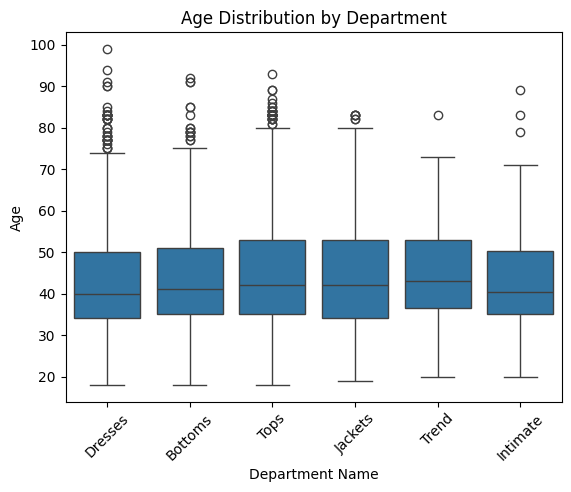

In [7]:
#Exolore Age by department 
sns.boxplot(data=df, x='Department Name', y='Age')
plt.title('Age Distribution by Department')
plt.xticks(rotation=45)
plt.show()

<h5>It seems that all the items share a similar age group of buyers, with dresses, bottoms, and tops showing the most outliers — which is expected</h5>

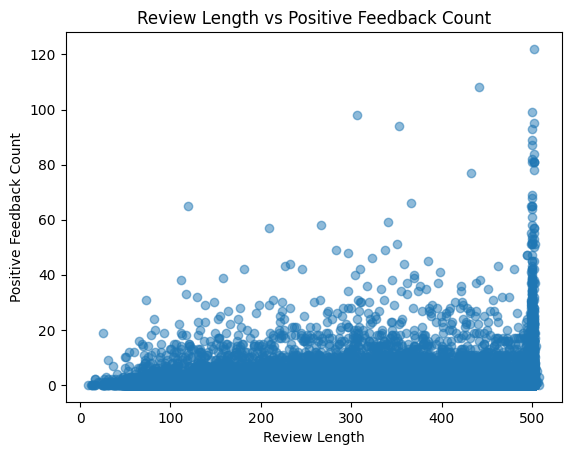

In [8]:
#Is there relastionship between positve feedback and length of review?
df['Review Length'] = df['Review Text'].fillna('').apply(len)
plt.scatter(df['Review Length'], df['Positive Feedback Count'], alpha=0.5)
plt.title('Review Length vs Positive Feedback Count')
plt.xlabel('Review Length')
plt.ylabel('Positive Feedback Count')
plt.show()

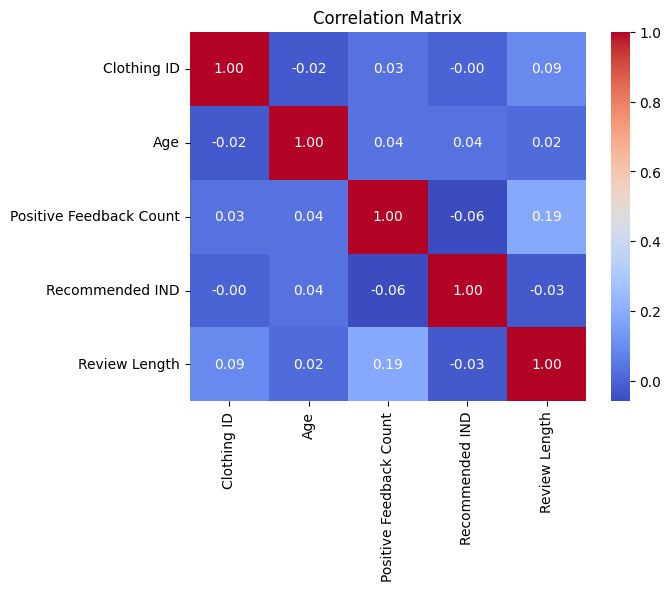

In [9]:
#Correlation Heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Building Pipeline

In [10]:
#Import pipleline library
from sklearn.pipeline import Pipeline

In [11]:
#Split data into numerical, categorical, and text features

num_features = (
    X.select_dtypes(exclude=['object']).columns.drop(
    ['Clothing ID'])
)
print('Numerical features:', num_features)

cat_features = (
    X[['Division Name','Department Name','Class Name']].columns
)
print('Categorical features:', cat_features)


text_features = (
    X[['Review Text']].columns
)
print ('Text features:', text_features)

Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Text features: Index(['Review Text'], dtype='object')


In [12]:
#Pipeline for numerical features called `num_pipeline``
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     
                     ('Standardscaler', StandardScaler())])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Standardscaler', StandardScaler())])

In [13]:
#Pipeline for categorical features called `cat_pipeline`
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy='most_frequent')),
                        ('one_encoder',OneHotEncoder(handle_unknown='ignore'))])

cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [14]:
#Custom function for text columns
import spacy
nlp = spacy.load('en_core_web_sm')
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from textblob import TextBlob
from scipy.sparse import csr_matrix

class CountPositive(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # If X is 2D, extract the first column
        if isinstance(X, (np.ndarray, pd.DataFrame)) and X.ndim == 2:
            X = X[:, 0] if isinstance(X, np.ndarray) else X.iloc[:, 0]

        # Ensure X is a Series of strings
        X = pd.Series(X).fillna("").astype(str)

        positive_counts = []
        for doc in self.nlp.pipe(X, disable=["ner", "parser"]):
            count = 0
            for token in doc:
                if token.is_alpha and not token.is_stop:
                    lemma = token.lemma_.lower()
                    polarity = TextBlob(lemma).sentiment.polarity
                    if polarity > 0:
                        count += 1
            positive_counts.append(count)

        # Return just the numerical feature
        return np.array(positive_counts).reshape(-1, 1)

In [15]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np



count_positive_pipeline = Pipeline([
    (
        'CountPositive',
        CountPositive(nlp),
    )
])
count_positive_pipeline



Pipeline(steps=[('CountPositive',
                 CountPositive(nlp=<spacy.lang.en.English object at 0x00000189B71E0D50>))])

In [16]:
#lemmatize the text using spaCy's NLP pipeline
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Handle 2D input (from ColumnTransformer or DataFrame)
        if isinstance(X, (np.ndarray, pd.DataFrame)) and X.ndim == 2:
            X = X[:, 0] if isinstance(X, np.ndarray) else X.iloc[:, 0]

        # Convert to pandas Series to ensure vectorized ops
        X = pd.Series(X)

        # Convert all entries to strings (guard against NaN, int, etc.)
        X = X.fillna("").astype(str)

        # Lemmatize using spaCy
        lemmatized = [
            ' '.join(token.lemma_ for token in doc if not token.is_stop)
            for doc in self.nlp.pipe(X, disable=["ner"])
        ]

        return pd.Series(lemmatized)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

tfidf_pipeline = Pipeline([
    
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ), 
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
   
])
tfidf_pipeline 

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x000001897E654670>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x00000189B71E0D50>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [18]:
#Combine the features for the text
from sklearn.pipeline import FeatureUnion
combined_text_pipeline = FeatureUnion([
    ('tfidf_text', tfidf_pipeline),         
    ('count_positive_pipeline', count_positive_pipeline)  
])

In [19]:
#Combine features Engineering Pipeline
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('count_positive_pipeline', count_positive_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features)
        
        
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Division Name', 'De...
                                 Index(['Review Text'], dtype='object')),
                                ('tfidf_text',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x000001897E654670>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x00000189B71E0D50>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 Index(['Review Text'], dtype='object'))])

## Training Pipeline

<h4>Now that we have the feature engineering pipeline created, we will append a
machine learning model (a classifier) to be trained with the features
engineering pipeline you created.</h4>

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

model_pipeline = make_pipeline(
    feature_engineering,
    LinearSVC(random_state=10),
)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_encoder',
                                                                   OneHotEncoder(handle_unknown='...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x000001897E654670>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x00000189B71E0D50>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('linearsvc', LinearSVC(random_state=10))])

## Evaluate Model

In [22]:
from sklearn.metrics import accuracy_score

y_pred_linearsvc_pipeline = model_pipeline.predict(X_test)
accuracy_linearsvc_pipeline = accuracy_score(y_test, y_pred_linearsvc_pipeline)

print('Accuracy:', accuracy_linearsvc_pipeline)

C:\Users\Holem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8785907859078591


## Fine-Tuning Pipeline

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distributions to search
my_distributions = {
    'linearsvc__C': [0.01, 0.1, 1, 10],
    'linearsvc__penalty': ['l2'],  # LinearSVC only supports 'l2'
    'linearsvc__loss': ['squared_hinge']
}

In [24]:
# Randomized search setup
param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',       # Change if needed
    verbose=1,
    n_jobs=-1,
    random_state=20
)

In [25]:
param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

C:\Users\Holem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'linearsvc__penalty': 'l2',
 'linearsvc__loss': 'squared_hinge',
 'linearsvc__C': 0.1}

In [26]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_encoder',
                                                                   OneHotEncoder(handle_unknown='...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x000001897E654670>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000018A2BC6FE10>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('linearsvc', LinearSVC(C=0.1, random_state=10))])

In [27]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

C:\Users\Holem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8791327913279133


<h4>As you can see the value got better by 0.00054
and we can modify it furthure to have better results</h4>